# Basic Plots

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

## Line Plot

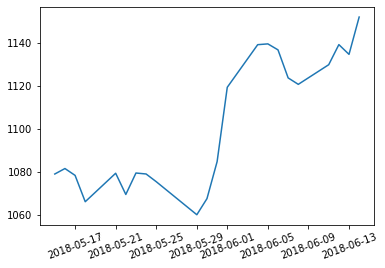

In [3]:
# 판다스로 데이터 처리
stock = pd.read_csv('data/part2_visual_GOOG.csv', header=None, delimiter=',')
stock.columns = ['Date','Price']
stock['Date'] = pd.to_datetime(stock['Date'], format='%d-%m-%Y')  
indexed_stock = stock.set_index('Date') 
ts = indexed_stock['Price']


# 그래프 그리기
plt.plot(ts)
plt.xticks(rotation=20)

# 화면에 출력
plt.show();

## Bar Chart

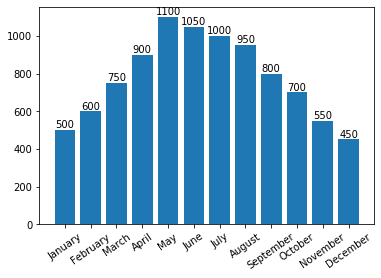

In [4]:
import numpy as np
import calendar

month_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
units_sold = [500, 600, 750, 900, 1100, 1050, 1000, 950, 800, 700, 550, 450]

fig, ax = plt.subplots()
plt.xticks(month_num, calendar.month_name[1:13], rotation=35)

plot = ax.bar(month_num, units_sold)

for rect in plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.002*height,'%d' % int(height), ha='center', va='bottom')

plt.show();

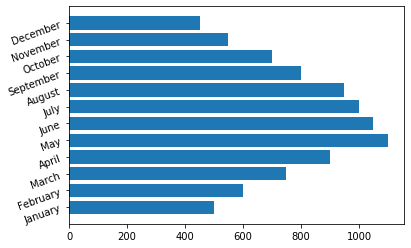

In [5]:
plt.yticks(month_num, calendar.month_name[1:13], rotation=20)
plot = plt.barh(month_num, units_sold)
plt.show();

## Scatter Plot

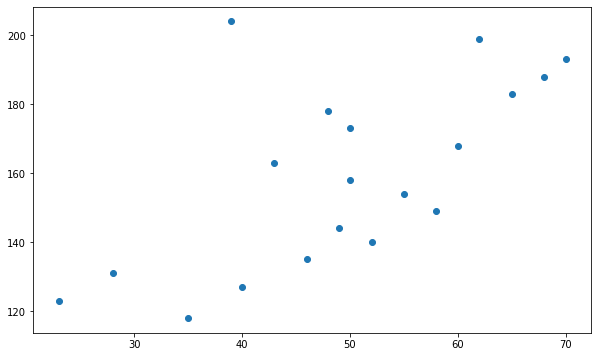

In [6]:
plt.figure(figsize=(10,6))
age_weight = pd.read_excel('data/part2_visual_scatter_ex.xlsx', 'age_weight')

x = age_weight['age']
y = age_weight['weight']

plt.scatter(x, y)
plt.show();

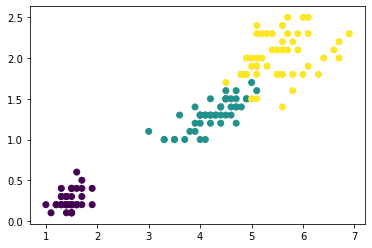

In [7]:
iris = pd.read_csv('data/part2_visual_iris_dataset.csv', delimiter=',')
iris['species'] = iris['species'].map({"setosa" : 0, "versicolor" : 1, "virginica" : 2}) # "" : 항목 이름 number : 컬러

plt.scatter(iris.petal_length, iris.petal_width, c=iris.species)
plt.show();

## Bubble Plot

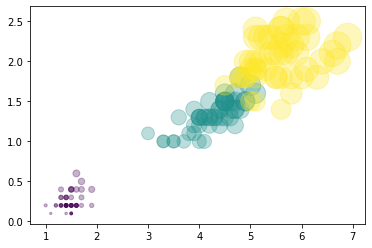

In [8]:
plt.scatter(iris.petal_length, iris.petal_width, s=50*iris.petal_length*iris.petal_width, 
            c=iris.species, alpha=0.3)
plt.show();

## Stacked Plot

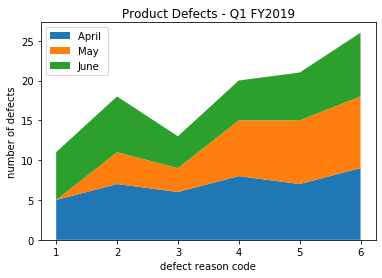

In [9]:
x = np.array([1, 2, 3, 4, 5, 6], dtype=np.int32)
Apr = [5, 7, 6, 8, 7, 9]
May = [0, 4, 3, 7, 8, 9]
June = [6, 7, 4, 5, 6, 8]

labels = ["April ", "May", "June"]

fig, ax = plt.subplots() #그래프안에 이름을 적을때
ax.stackplot(x, Apr, May, June, labels=labels)
ax.legend(loc=2)

plt.xlabel('defect reason code')
plt.ylabel('number of defects')
plt.title('Product Defects - Q1 FY2019')

plt.show();

## Pie Plot

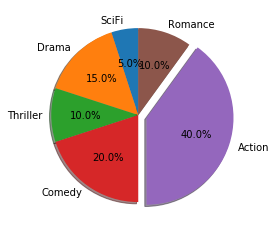

In [10]:
labels = ['SciFi', 'Drama', 'Thriller', 'Comedy', 'Action', 'Romance']
sizes = [5, 15, 10, 20, 40, 10]
explode = (0, 0, 0, 0, 0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

## Table Chart

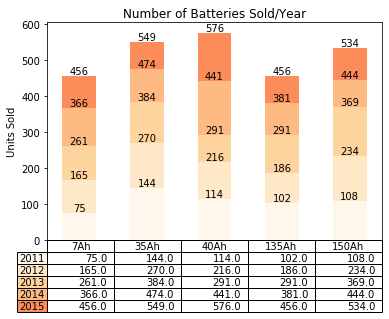

In [11]:
rows = ['2011', '2012', '2013', '2014', '2015']
columns = ('7Ah', '35Ah', '40Ah', '135Ah', '150Ah')

data = [[75, 144, 114, 102, 108],
        [90, 126, 102,  84, 126],
        [96, 114,  75, 105, 135],
        [105, 90, 150,  90,  75],
        [90,  75, 135,  75,  90]]
#데이터 판다스꼴이아니다!! 잘봐라

values = np.arange(0, 600, 100)

colors = plt.cm.OrRd(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)
plot
index = np.arange(len(columns)) + 0.3
bar_width = 0.5

y_offset = np.zeros(len(columns))

#그래프 그리기 
# 2-1) 그래프안에 텍스트를 출력해야한다 
# 2-2) 출력하지않는다 

fig, ax = plt.subplots()#셀로판지

cell_text = []

for row in range(n_rows):
    plot = plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x) for x in y_offset])
    i=0
    for rect in plot: #텍스트를 중첩해서 쌓을려고 반복문
        ax.text(rect.get_x() + rect.get_width()/2, y_offset[i],'%d' % int(y_offset[i]), ha='center', va='bottom')
        i = i+1   

the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

plt.ylabel("Units Sold")
plt.title('Number of Batteries Sold/Year')

plt.xticks([])
plt.show()

## Polar Plot

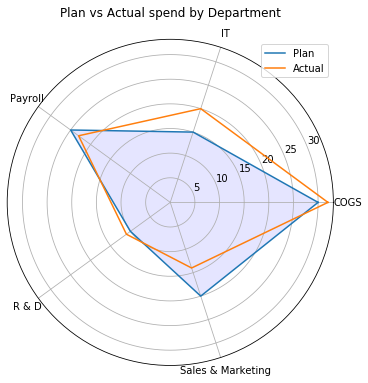

In [12]:
Depts = ["COGS","IT","Payroll","R & D", "Sales & Marketing"]

rp = [30, 15, 25, 10, 20, 30]
ra = [32, 20, 23, 11, 14, 32]

plt.figure(figsize=(10,6))
plt.subplot(polar=True)

theta = np.linspace(0, 2 * np.pi, len(rp))

(lines,labels) = plt.thetagrids(range(0,360, int(360/len(Depts))), (Depts))

plt.plot(theta, rp)
plt.fill(theta, rp, 'b', alpha=0.1)
plt.plot(theta, ra)
plt.legend(labels=('Plan','Actual'),loc=1)
plt.title("Plan vs Actual spend by Department")

plt.show();

## Histogram Plot

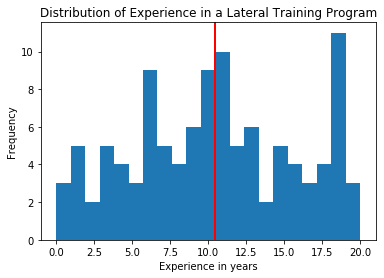

Mean Experience of DSS Batch: 10.435
Std Deviation of Experience of DSS Batch: 5.665


In [13]:
grp_exp = np.array([12,  15,  13,  20,  19,  20,  11,  19,  11,  12,  19,  13,  
                    12,  10,  6,  19,  3,  1,  1,  0,  4,  4,  6,  5,  3,  7,  
                    12,  7,  9,  8,  12,  11,  11,  18,  19,  18,  19,  3,  6,  
                     5,  6,  9,  11,  10,  14,  14,  16,  17,  17,  19,  0,  2,  
                     0,  3,  1,  4,  6,  6,  8,  7,  7,  6,  7,  11,  11,  10,  
                    11,  10,  13,  13,  15,  18,  20,  19,  1,  10,  8,  16,  
                    19,  19,  17,  16,  11,  1,  10,  13,  15,  3,  8,  6,  9,  
                    10,  15,  19,  2,  4,  5,  6,  9,  11,  10,  9,  10,  9,  
                    15,  16,  18,  13])

nbins = 21
n, bins, patches = plt.hist(grp_exp, bins = nbins)

plt.xlabel("Experience in years")
plt.ylabel("Frequency")
plt.title("Distribution of Experience in a Lateral Training Program")

plt.axvline(x=grp_exp.mean(), linewidth=2, color = 'r') 
plt.show();

print("Mean Experience of DSS Batch: {:4.3f}".format(grp_exp.mean()))
print("Std Deviation of Experience of DSS Batch: {:4.3f}".format(grp_exp.std()))

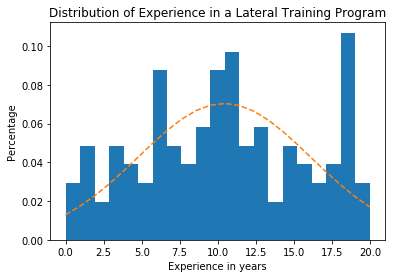

Mean Experience of DSS Batch: 10.435
Std Deviation of Experience of DSS Batch: 5.665


In [14]:
grp_exp = np.array([12,  15,  13,  20,  19,  20,  11,  19,  11,  12,  19,  13,  
                    12,  10,  6,  19,  3,  1,  1,  0,  4,  4,  6,  5,  3,  7,  
                    12,  7,  9,  8,  12,  11,  11,  18,  19,  18,  19,  3,  6,  
                     5,  6,  9,  11,  10,  14,  14,  16,  17,  17,  19,  0,  2,  
                     0,  3,  1,  4,  6,  6,  8,  7,  7,  6,  7,  11,  11,  10,  
                    11,  10,  13,  13,  15,  18,  20,  19,  1,  10,  8,  16,  
                    19,  19,  17,  16,  11,  1,  10,  13,  15,  3,  8,  6,  9,  
                    10,  15,  19,  2,  4,  5,  6,  9,  11,  10,  9,  10,  9,  
                    15,  16,  18,  13])

nbins = 21
n, bins, patches = plt.hist(grp_exp, bins = nbins, density=1)

plt.xlabel("Experience in years")
plt.ylabel("Percentage")
plt.title("Distribution of Experience in a Lateral Training Program")
mu = grp_exp.mean()
sigma = grp_exp.std()

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins, y, '--')#그래프하나
plt.show()

print("Mean Experience of DSS Batch: {:4.3f}".format(grp_exp.mean()))
print("Std Deviation of Experience of DSS Batch: {:4.3f}".format(grp_exp.std()))

## Box Plot

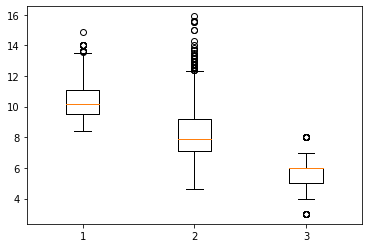

In [15]:
wine_quality = pd.read_csv('data/part2_visual_winequality.csv', delimiter=';')
data = [wine_quality['alcohol'], wine_quality['fixed acidity'], wine_quality['quality']]
plt.boxplot(data)

plt.show()


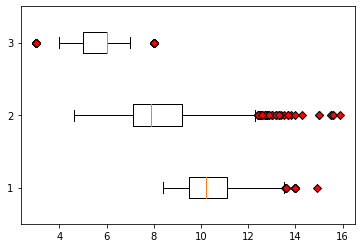

In [16]:
plt.boxplot(data, vert=False, flierprops=dict(markerfacecolor='r', marker='D'))
plt.show();

## Violin Plot

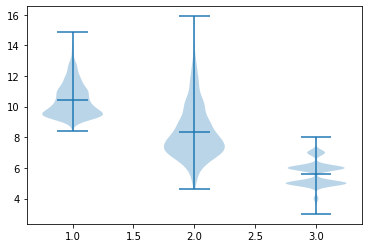

In [17]:
wine_quality = pd.read_csv('data/part2_visual_winequality.csv', delimiter=';')
data = [wine_quality['alcohol'], wine_quality['fixed acidity'], wine_quality['quality']]
plt.violinplot(data, showmeans=True)

plt.show();

## Displaying Images with color bar(Heatmap)

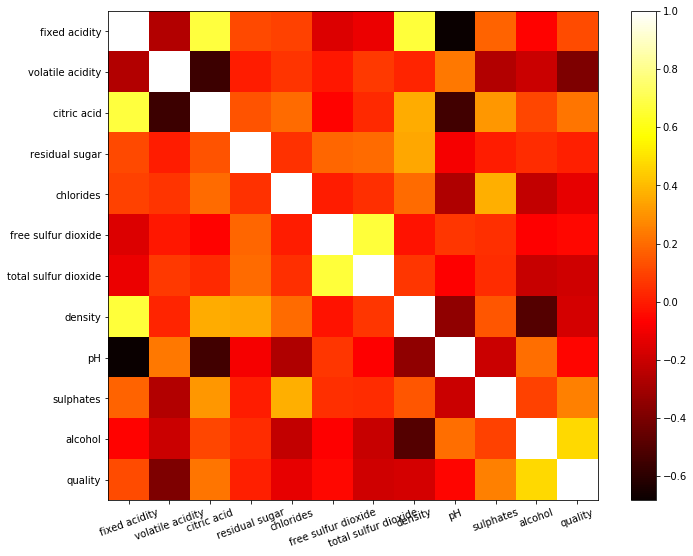

In [18]:
wine_quality = pd.read_csv('data/part2_visual_winequality.csv', delimiter=';')

corr = wine_quality.corr()

plt.figure(figsize=(12,9))
plt.imshow(corr,cmap='hot');
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns, rotation=20)
plt.yticks(range(len(corr)),corr.columns);


## Hinton Diagram

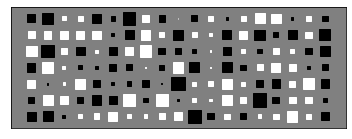

In [19]:
matrix = np.asarray((pd.read_excel('data/part2_visual_weight_matrix.xlsx')))

fig, ax = plt.subplots()

max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

ax.patch.set_facecolor('gray')
ax.set_aspect('equal', 'box')
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

for (x, y), w in np.ndenumerate(matrix):
    color = 'white' if w > 0 else 'black'
    size = np.sqrt(np.abs(w) / max_weight)
    rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                         facecolor=color, edgecolor=color)
    ax.add_patch(rect)

ax.autoscale_view()

plt.show()


## Contour Plot

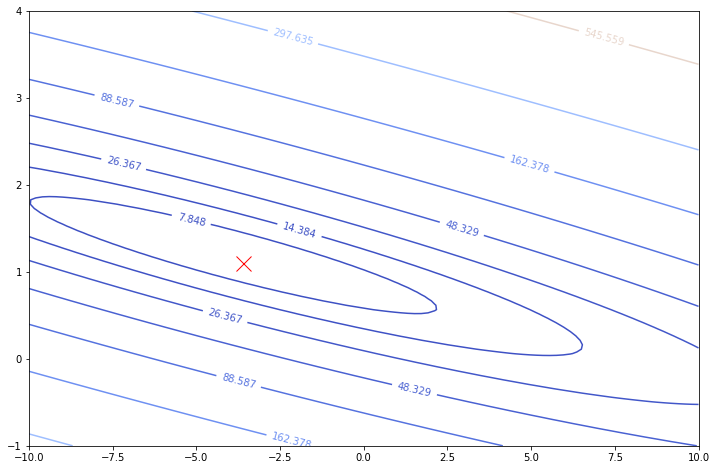

In [20]:
from matplotlib import cm

Loss = pd.read_excel('data/part2_visual_Loss.xlsx')
theta0_vals = pd.read_excel('data/part2_visual_theta0.xlsx')
theta1_vals = pd.read_excel('data/part2_visual_theta1.xlsx')

fig = plt.figure(figsize=(12,8))
X, Y = np.meshgrid(theta0_vals, theta1_vals)
CS = plt.contour(X, Y, Loss, np.logspace(-2,3,20), cmap=cm.coolwarm)
plt.clabel(CS, inline=1, fontsize=10)

# Plot the minimum point(Theta at Minimum cost)
theta = [-3.6, 1.1]
plt.plot(theta[0], theta[1], 'rx', markersize=15, linewidth=2)
plt.show()

## Triangulations

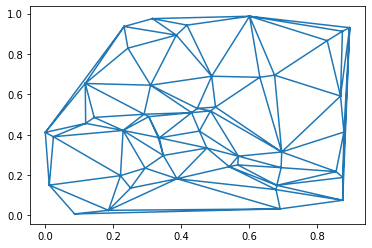

In [21]:
import matplotlib.tri as tri

data = np.random.rand(50, 2)
triangles = tri.Triangulation(data[:,0], data[:,1])
plt.triplot(triangles)
plt.show()

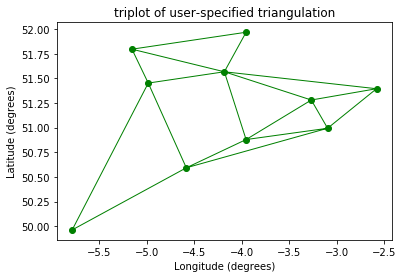

In [22]:
xy = np.array([[-0.101, 0.872], [-0.080, 0.883], [-0.069, 0.888], [-0.054, 0.890],
               [-0.045, 0.897], [-0.057, 0.895], [-0.073, 0.900], [-0.087, 0.898],
               [-0.090, 0.904], [-0.069, 0.907]])
x = np.degrees(xy[:, 0])
y = np.degrees(xy[:, 1])
triangles = np.array([[1, 2, 3], [3, 4, 5], [4, 5, 6], [2, 5, 6], [6, 7, 8], [6, 8, 9], [0, 1, 7]])
plt.triplot(x, y, triangles, 'go-', lw=1.0)
plt.title('triplot of user-specified triangulation')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.show()

## Stream Plot

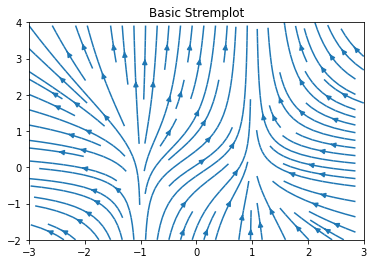

In [23]:
import matplotlib.gridspec as gridspec

x, y = np.linspace(-3,3,100), np.linspace(-2,4,50)
X, Y = np.meshgrid(x, y)
U = 1 - X**2 
V = 1 + Y**2 
plt.streamplot(X, Y, U, V)
plt.title('Basic Stremplot')
plt.show()


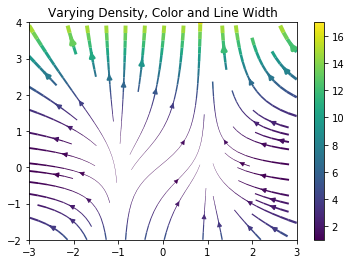

In [24]:
# Define the speed as a function of U amd V
speed = np.sqrt(U*U + V*V)
#  Varying line width along a streamline
lw = 5*speed / speed.max()
strm = plt.streamplot(X, Y, U, V, density=[0.5, 1], color=V, linewidth=lw)
plt.colorbar(strm.lines)
plt.title('Varying Density, Color and Line Width')
plt.show()

# Plotting Multiple charts, subplots and figures

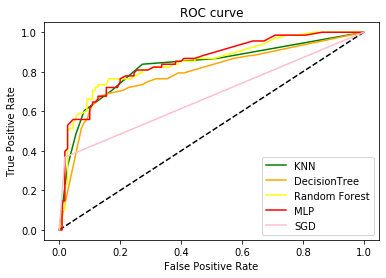

In [25]:
fpr_KNN = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'fpr_KNN')
tpr_KNN = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'tpr_KNN')
fpr_MLP = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'fpr_MLP')
tpr_MLP = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'tpr_MLP')
fpr_SGD = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'fpr_SGD')
tpr_SGD = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'tpr_SGD')
fpr_RF = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'fpr_RF')
tpr_RF = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'tpr_RF')
fpr_DT = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'fpr_DT')
tpr_DT = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'tpr_DT')

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_KNN, tpr_KNN, label='KNN',color='green')
plt.plot(fpr_DT, tpr_DT, label='DecisionTree', color='orange')
plt.plot(fpr_RF, tpr_RF, label='Random Forest',color='yellow')
plt.plot(fpr_MLP, tpr_MLP, label='MLP',color='red')
plt.plot(fpr_SGD, tpr_SGD, label='SGD', color='pink')

# fpr_logreg = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'fpr_logreg')
# tpr_logreg = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'tpr_logreg')
# fpr_GNB = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'fpr_GNB')
# tpr_GNB = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'tpr_GNB')
# fpr_svc = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'fpr_svc')
# tpr_svc = pd.read_excel('data/part2_visual_ROC_Curves.xlsx', 'tpr_svc')
# plt.plot(fpr_logreg, tpr_logreg, label='LogReg',color='purple')
# plt.plot(fpr_svc, tpr_svc, label='SVC',color='violet')
# plt.plot(fpr_GNB, tpr_GNB, label='GNB',color='grey')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


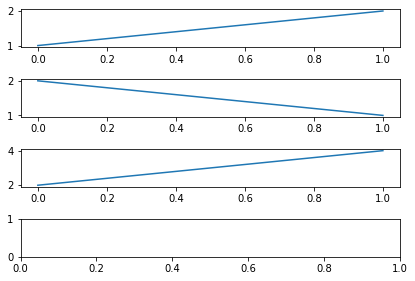

In [26]:
plt.close('all')
fig = plt.figure()#조립형 셀로판지

# ax1 = plt.subplot(221)# ax1, 2를보면 맨뒤숫자이해 ㅇㅇ전체행 전체열 위치
# ax2 = plt.subplot(222)
# ax3 = plt.subplot(212)

ax1 = plt.subplot(411)# ax1, 2를보면 맨뒤숫자이해 ㅇㅇ(전체행 전체열 위치)
ax2 = plt.subplot(412)
ax3 = plt.subplot(413)
ax4 = plt.subplot(414)

ax1.plot([1,2])
ax2.plot([2,1])
ax3.plot([2,4])

plt.tight_layout()
plt.show();


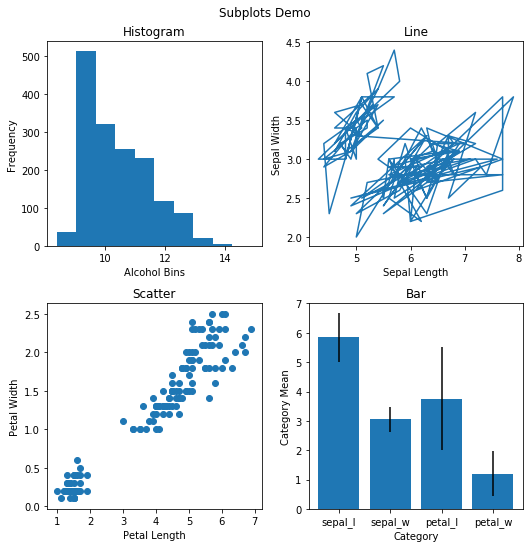

In [27]:
#위의 것이랑 같은데 이게 더 편하다
wine_quality = pd.read_csv('data/part2_visual_winequality.csv', delimiter=';')
iris = pd.read_csv('data/part2_visual_iris_dataset.csv', delimiter=',')
iris_mean = iris.mean()
iris_std = iris.std()

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].hist(wine_quality['alcohol'])
axs[0, 0].set(title='Histogram', xlabel='Alcohol Bins', ylabel='Frequency')

axs[0, 1].plot(iris['sepal_length'], iris['sepal_width'])
axs[0, 1].set(title='Line', xlabel='Sepal Length', ylabel='Sepal Width')

axs[1, 0].scatter(iris['petal_length'], iris['petal_width'])
axs[1, 0].set(title='Scatter', xlabel='Petal Length', ylabel='Petal Width')

axs[1, 1].bar(['sepal_l','sepal_w', 'petal_l', 'petal_w'], iris_mean, yerr=iris_std)
#axs[1, 1].bar([0, 1, 2, 3], iris_mean, yerr=iris_std) for older versions of matplotlib
axs[1, 1].set(title='Bar', xlabel='Category', ylabel='Category Mean')

plt.suptitle('Subplots Demo')
plt.tight_layout(pad=3, w_pad=1.0, h_pad=1.0)
plt.show()


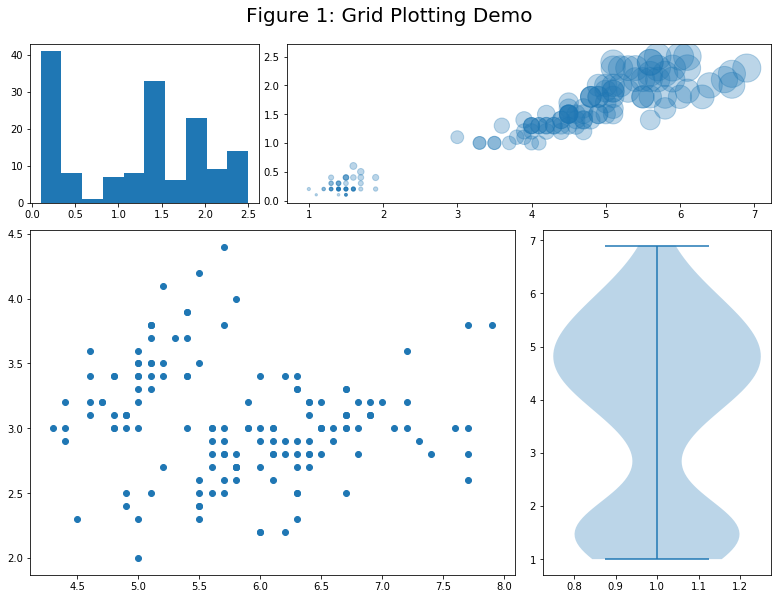

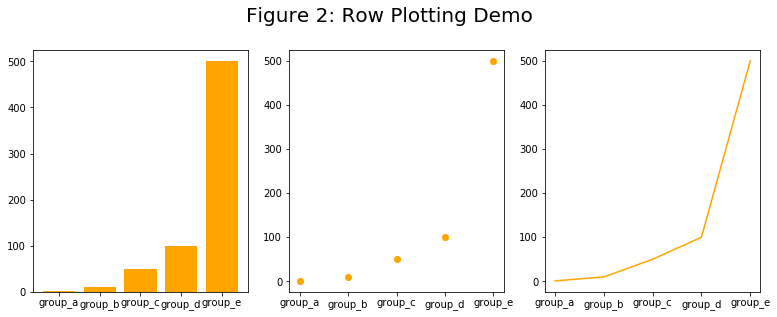

In [28]:
plt.close('all')
iris = pd.read_csv('data/part2_visual_iris_dataset.csv', delimiter=',')

fig = plt.figure(1, figsize=(12, 9))

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

ax1.hist(iris['petal_width'])
ax2.scatter(iris['petal_length'], iris['petal_width'], 
            s=50*iris['petal_length']*iris['petal_width'], alpha=0.3)
ax3.scatter(iris['sepal_length'], iris['sepal_width'])
ax4.violinplot(iris['petal_length'])

plt.suptitle('Figure 1: Grid Plotting Demo', fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=1.0)

plt.figure(2, figsize=(12, 5))

names = ['group_a', 'group_b', 'group_c', 'group_d', 'group_e']
values = [1, 10, 50, 100, 500]

plt.subplot(131)
plt.bar(names, values, color='orange')

plt.subplot(132)
plt.scatter(names, values, color='orange')

plt.subplot(133)
plt.plot(names, values, color='orange')

plt.suptitle('Figure 2: Row Plotting Demo', fontsize=20)

plt.tight_layout(pad=5, w_pad=0.5, h_pad=1.0)

plt.show();


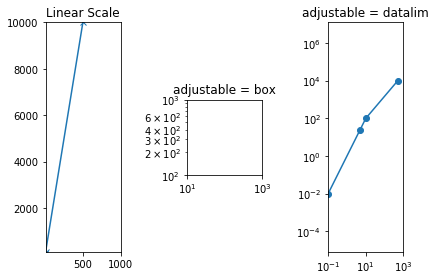

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.plot([0.1, 5, 10, 500], [0.01, 25, 100, 10000], "x-")
ax1.set(title="Linear Scale", xlim=(1e1, 1e3), ylim=(1e2, 1e4))

ax2.set(title="adjustable = box", xscale="log", yscale="log", xlim=(1e1, 1e3), 
        ylim=(1e2, 1e3), aspect=2)

ax3.plot([0.1, 5, 10, 500], [0.01, 25, 100, 10000], "o-")
ax3.set(title="adjustable = datalim", xscale="log", yscale="log", adjustable="datalim", 
        xlim=(1e-1, 1e3), ylim=(1e-2, 1e4), aspect=1)

plt.tight_layout()

plt.show()


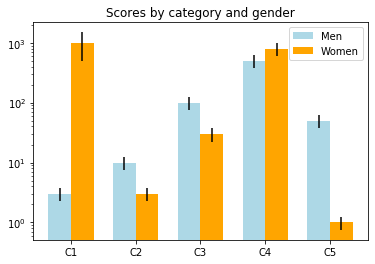

In [30]:
menMeans = [3, 10, 100, 500, 50]
menStd = [0.75, 2.5, 25, 125, 12.5]

fig, ax = plt.subplots()
ind = np.arange(len(menMeans))                # the x locations for the groups
width = 0.35                                  # the width of the bars
p1 = ax.bar(ind, menMeans, width, color='lightblue', bottom=0, yerr=menStd)

womenMeans = [1000, 3, 30, 800, 1]
womenStd = [500, 0.75, 8, 200, 0.25]

p2 = ax.bar(ind + width, womenMeans, width, color='orange', bottom=0, yerr=womenStd)
ax.set_title('Scores by category and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('C1', 'C2', 'C3', 'C4', 'C5'))

ax.set_yscale('log')
ax.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()
